## Clustering Stocks with Python

##### Uses the unsupervised machine learning algorithm of K-means and the Principal Component Analysis method to perform clustering of stock data. 

In [165]:
# import the library.
import requests
import pandas as pd

#### Load the Stock Symbols

In [168]:
stock_symbols = pd.read_csv("stock_list.csv")

In [170]:
# remove inherent bad characters in the list.
stock_symbols["Symbol"]= stock_symbols["Symbol"].str.replace("^"," ")

In [172]:
# display the rows & columns.
display(stock_symbols.shape)

(5807, 1)

In [174]:
# Break the 5807 into chucks of 100 to request multiple stocks at once.
n= 100
symbols_chunk = [stock_symbols[i:i+n] for i in range (0, stock_symbols.shape[0], n)]

In [176]:
# view a segment of the chunks.
example_chunk = list(symbols_chunk[0]["Symbol"])
example_chunk[:5]

['A', 'AA', 'AABA', 'AAC', 'AAL']

#### Load the Data

In [179]:
stock_df = pd.read_csv("stock_data.csv")

In [181]:
# View the first 5 rows
display(stock_df.head())

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,epsChangePercentTTM,epsChangeYear,epsTTM,grossMarginMRQ,grossMarginTTM,high52,interestCoverage,low52,ltDebtToEquity,marketCap,marketCapFloat,netProfitMarginMRQ,netProfitMarginTTM,operatingMarginMRQ,operatingMarginTTM,pbRatio,pcfRatio,peRatio,pegRatio,prRatio,quickRatio,returnOnAssets,returnOnEquity,returnOnInvestment,revChangeIn,revChangeTTM,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
0,1.21802,2.79895,1.31538,0.0,3.080000,2019-05-10 00:00:00.0,0.770000,2019-08-16 00:00:00.0,1.57,0.0,7.49297,0.00000,11.66718,37.61269,38.05060,233.4700,0.0,142.00,85.20782,899832.3000,4597.90100,19.9276,21.69136,23.12333,25.33599,8.51168,13.24763,16.76241,2.237085,3.48111,1.26330,15.8055,48.18294,21.30287,0.0000,4.47544,0.0,4601.07500,0.0,0.0,AAPL,51.54927,106.3952,22963900.0,22963900.0,585636010.0
1,2.35784,0.00000,18.20330,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,0.00000,23.37506,0.00000,0.00000,0.00000,12.1000,0.0,2.62,0.00000,701.5884,56.47487,0.0000,0.00000,0.00000,0.00000,3.70299,0.00000,0.00000,0.000000,502.57050,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0,63.78077,0.0,0.0,ADVM,0.00000,0.0000,625225.0,625220.0,13701860.0
2,0.85623,31.06079,3.46119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,0.00000,0.00000,0.39141,59.50868,60.51562,76.4544,0.0,39.43,0.00000,4069.7420,57.96267,5.5427,5.29100,2.30636,3.20455,8.46652,119.69120,175.85140,0.000000,9.36298,3.23171,4.0626,6.76543,5.47783,0.8877,18.83474,0.0,59.12744,0.0,0.0,AAXN,0.00000,0.0000,1287277.0,1287280.0,15188870.0
3,0.66686,0.00000,6.23734,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,0.00000,86.04662,0.00000,60.05314,79.70192,4.3500,0.0,2.75,0.00000,144.6858,49.49486,0.0000,0.00000,0.00000,0.00000,0.77570,0.00000,0.00000,0.000000,1.98744,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0,50.06428,0.0,0.0,ACTG,0.00000,0.0000,104801.0,104800.0,2676700.0
4,0.94418,0.00000,0.00000,0.0,1.338665,2019-06-17 00:00:00.0,0.411154,2019-12-23 00:00:00.0,1.95,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,73.6900,0.0,60.48,0.00000,4036.6200,58.78215,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0,58.80000,0.0,0.0,AAXJ,0.00000,0.0000,736602.0,736600.0,29469660.0


In [183]:
# What are all the columns?
pd.set_option("display.max_columns", None)
stock_df.head()

,beta,bookValuePerShare,currentRatio,divGrowthRate3Year,dividendAmount,dividendDate,dividendPayAmount,dividendPayDate,dividendYield,epsChange,epsChangePercentTTM,epsChangeYear,epsTTM,grossMarginMRQ,grossMarginTTM,high52,interestCoverage,low52,ltDebtToEquity,marketCap,marketCapFloat,netProfitMarginMRQ,netProfitMarginTTM,operatingMarginMRQ,operatingMarginTTM,pbRatio,pcfRatio,peRatio,pegRatio,prRatio,quickRatio,returnOnAssets,returnOnEquity,returnOnInvestment,revChangeIn,revChangeTTM,revChangeYear,sharesOutstanding,shortIntDayToCover,shortIntToFloat,symbol,totalDebtToCapital,totalDebtToEquity,vol10DayAvg,vol1DayAvg,vol3MonthAvg
0,1.21802,2.79895,1.31538,0.0,3.080000,2019-05-10 00:00:00.0,0.770000,2019-08-16 00:00:00.0,1.57,0.0,7.49297,0.00000,11.66718,37.61269,38.05060,233.4700,0.0,142.00,85.20782,899832.3000,4597.90100,19.9276,21.69136,23.12333,25.33599,8.51168,13.24763,16.76241,2.237085,3.48111,1.26330,15.8055,48.18294,21.30287,0.0000,4.47544,0.0,4601.07500,0.0,0.0,AAPL,51.54927,106.3952,22963900.0,22963900.0,585636010.0
1,2.35784,0.00000,18.20330,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,0.00000,23.37506,0.00000,0.00000,0.00000,12.1000,0.0,2.62,0.00000,701.5884,56.47487,0.0000,0.00000,0.00000,0.00000,3.70299,0.00000,0.00000,0.000000,502.57050,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0,63.78077,0.0,0.0,ADVM,0.00000,0.0000,625225.0,625220.0,13701860.0
2,0.85623,31.06079,3.46119,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,0.00000,0.00000,0.39141,59.50868,60.51562,76.4544,0.0,39.43,0.00000,4069.7420,57.96267,5.5427,5.29100,2.30636,3.20455,8.46652,119.69120,175.85140,0.000000,9.36298,3.23171,4.0626,6.76543,5.47783,0.8877,18.83474,0.0,59.12744,0.0,0.0,AAXN,0.00000,0.0000,1287277.0,1287280.0,15188870.0
3,0.66686,0.00000,6.23734,0.0,0.000000,NaN,0.000000,NaN,0.00,0.0,0.00000,86.04662,0.00000,60.05314,79.70192,4.3500,0.0,2.75,0.00000,144.6858,49.49486,0.0000,0.00000,0.00000,0.00000,0.77570,0.00000,0.00000,0.000000,1.98744,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0,50.06428,0.0,0.0,ACTG,0.00000,0.0000,104801.0,104800.0,2676700.0
4,0.94418,0.00000,0.00000,0.0,1.338665,2019-06-17 00:00:00.0,0.411154,2019-12-23 00:00:00.0,1.95,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,73.6900,0.0,60.48,0.00000,4036.6200,58.78215,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.0,58.80000,0.0,0.0,AAXJ,0.00000,0.0000,736602.0,736600.0,29469660.0


In [185]:
# What is the shape of the data?
stock_df.shape

(5222, 46)

#### Selecting the Financial Attributes.

In [188]:
# Use Return on Equity, Return on Assets and Return on Investments as financial indicators of good performance.

In [190]:
# What are the metrics?
metric_list = ["returnOnEquity", "returnOnAssets", "returnOnInvestment", "symbol"]

In [192]:
# select only those columns.
indicators_df = stock_df[metric_list]

In [194]:
# display the unmodified dataframe.
display(indicators_df.head())

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.8055,21.30287,AAPL
1,0.00000,0.0000,0.00000,ADVM
2,6.76543,4.0626,5.47783,AAXN
3,0.00000,0.0000,0.00000,ACTG
4,0.00000,0.0000,0.00000,AAXJ


In [196]:
# drop all missing values of 0 or NaN. 
indicators_df = indicators_df[indicators_df[metric_list] != 0]
indicators_df = indicators_df.dropna(how="any")

display(indicators_df.head())

,returnOnEquity,returnOnAssets,returnOnInvestment,symbol
0,48.18294,15.80550,21.30287,AAPL
2,6.76543,4.06260,5.47783,AAXN
5,45.43475,30.16776,36.04312,ADES
6,12.91672,3.53989,4.31677,ACCO
12,12.08748,4.19331,4.94682,AAWW


In [198]:
# rename multiple column names.
indicators_df.rename(columns= {"returnOnEquity": "ROE",
                               "returnOnAssets" : "ROA",
                               "returnOnInvestment": "ROI"}, inplace = True)
display(indicators_df.head())

,ROE,ROA,ROI,symbol
0,48.18294,15.80550,21.30287,AAPL
2,6.76543,4.06260,5.47783,AAXN
5,45.43475,30.16776,36.04312,ADES
6,12.91672,3.53989,4.31677,ACCO
12,12.08748,4.19331,4.94682,AAWW


In [200]:
# set the symbol as the index.
indicators_df = indicators_df.set_index("symbol")

In [202]:
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2102 entries, AAPL to ZYXI
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ROE     2102 non-null   float64
 1   ROA     2102 non-null   float64
 2   ROI     2102 non-null   float64
dtypes: float64(3)
memory usage: 65.7+ KB


In [204]:
indicators_df.head()

,ROE,ROA,ROI
symbol,,,
AAPL,48.18294,15.80550,21.30287
AAXN,6.76543,4.06260,5.47783
ADES,45.43475,30.16776,36.04312
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682


#### Remove Outliers. 

In [207]:
# define the fliters.
roe_filter = indicators_df.iloc[:,0] < 40
roa_filter = indicators_df.iloc[:,1] < 30
roi_filter = indicators_df.iloc[:,2] < 30

In [209]:
# get the counts for each column.
roe_count = pd.Series(roe_filter).value_counts()
roa_count = pd.Series(roa_filter).value_counts()
roi_count = pd.Series(roi_filter).value_counts()

In [211]:
# display the results.
display(roe_count)
display("-" * 100)
display(roa_count)
display("-" * 100)
display(roi_count)

ROE
True     1909
False     193
Name: count, dtype: int64

'----------------------------------------------------------------------------------------------------'

ROA
True     2058
False      44
Name: count, dtype: int64

'----------------------------------------------------------------------------------------------------'

ROI
True     2021
False      81
Name: count, dtype: int64

In [213]:
# filter the entire dataframe.
indicators_df = indicators_df[roe_filter & roa_filter & roi_filter]
# display the results.
indicators_df.head()

,ROE,ROA,ROI
symbol,,,
AAXN,6.76543,4.06260,5.47783
ACCO,12.91672,3.53989,4.31677
AAWW,12.08748,4.19331,4.94682
ADUS,7.51694,5.33343,6.52183
AB,15.52055,15.50523,15.50523


In [215]:
# create a statistical summary.
desc_df = indicators_df.describe()

In [217]:
# add the +/- 3 std deviations.
desc_df.loc["+3_std"]= desc_df.loc["mean"] + (desc_df.loc["std"] * 3)
desc_df.loc["-3_std"]= desc_df.loc["mean"] - (desc_df.loc["std"] * 3)

In [219]:
# display the dataframe.
display(desc_df)

,ROE,ROA,ROI
count,1886.000000,1886.000000,1886.000000
mean,12.588871,5.964759,7.578311
std,8.701498,4.582212,5.824265
min,0.044180,0.036950,0.041490
25%,5.750330,2.577993,3.136615
50%,11.045815,4.765765,6.151425
75%,17.580588,8.168385,10.504722
max,39.538890,26.093900,29.889750
+3_std,38.693367,19.711394,25.051107
-3_std,-13.515624,-7.781876,-9.894485


#### Visualise the Data

In [231]:
%matplotlib inline

In [276]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

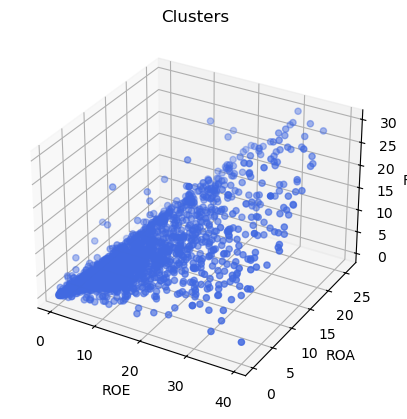

In [296]:
# define the x, y & z axis.
x = list(indicators_df.iloc[:,0])
y = list(indicators_df.iloc[:,1])
z = list(indicators_df.iloc[:,2])

# plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# label the axis.
column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# Create a title.
ax.set_title("Clusters")

# define the markets and the colour.
ax.scatter(x,y,z,c="royalBlue", marker="o")

# display the plot
plt.show()

In [304]:
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [306]:
# Create the instances of the scalers.
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

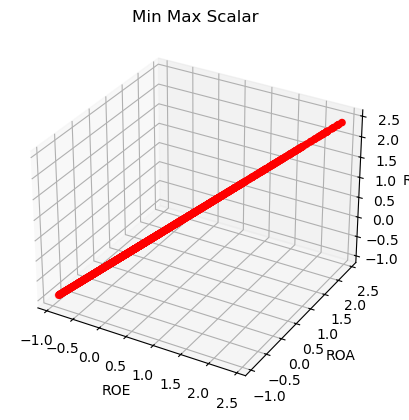

In [330]:
# Create the instances of the scalers.
min_max_scaler = MinMaxScaler()

# Scale the Data.
X_train_minmax = min_max_scaler.fit_transform(indicators_df)

# plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# scale the data.
x = X_train_robust[:,0]
y = X_train_robust[:,0]
z = X_train_robust[:,0]

# label the axis.
column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# Create a title.
ax.set_title("Min Max Scalar")

# define the markets and the colour.
ax.scatter(x,y,z,c="Red")

# display the plot
plt.show()

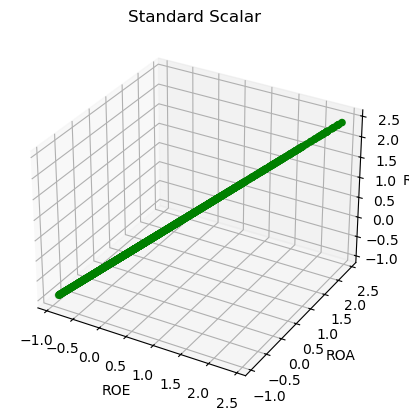

In [328]:
# Create the instances of the scalers.
std_scaler = StandardScaler()

# Scale the Data.
X_train_standard = std_scaler.fit_transform(indicators_df)

# plot the figure
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# scale the data.
x = X_train_robust[:,0]
y = X_train_robust[:,0]
z = X_train_robust[:,0]

# label the axis.
column_names = indicators_df.columns
ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

# Create a title.
ax.set_title("Standard Scalar")

# define the markets and the colour.
ax.scatter(x,y,z,c="Green")

# display the plot
plt.show()

##### Principal Component Analysis

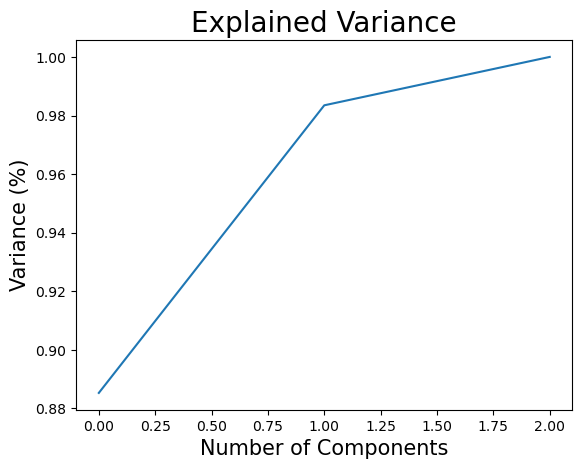

In [333]:
from sklearn.decomposition import PCA

# pass through the scaled data set into our PCA class object
pca = PCA().fit(X_train_robust)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()

In [335]:
# create a PCA modified dataset
pca_dataset = PCA(n_components=2).fit(X_train_robust).transform(X_train_robust)

# store it in a new data frame
pca_dataset= pd.DataFrame(data = pca_dataset, columns = ['principal component 1', 'principal component 2'])

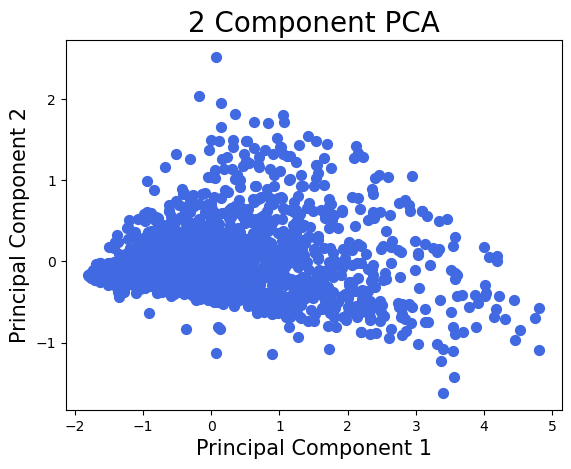

In [337]:
# define a figure
plt.figure()

# define the label and title
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 Component PCA', fontsize = 20)

# plot the figure
plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='royalBlue', s = 50)

#### Build the K-Means Model

In [341]:
from sklearn.cluster import KMeans
from sklearn import metrics

# define a dictionary that contains all of our relevant info.
results_dict = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*50)
    
    # define the next dictionary to hold all the results of this run.
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_robust)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(X_train_robust, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)


--------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.5409025131522358
--------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.4715762202588651
--------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.4073860864605897
--------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.38014530345371883
--------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.39534907281319576
--------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.3746451647579635
--------------------------------------------------
Number of Clusters: 8
Silhouette Score: 0.3754864776522667
--------------------------------------------------
Number of Clusters: 9
Silhouette Score: 0.3735059993936444


##### Clustering with PCA

In [344]:
# define a dictionary that contains all of our relevant info.
results_dict_pca = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict_pca[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_dataset)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(pca_dataset, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict_pca[k]['silhouette_score'] = sil_score
    results_dict_pca[k]['inertia'] = kmeans.inertia_
    results_dict_pca[k]['score'] = kmeans.score
    results_dict_pca[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)


----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.5526552721011729
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.48396902228417316
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.423424562148104
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.3866072290408471
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.40488489780144704
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.38438224332882986
--------------------------------------

#### Model Evaluation

In [360]:
# import libraries
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import SilhouetteVisualizer

----------------------------------------------------------------------------------------------------


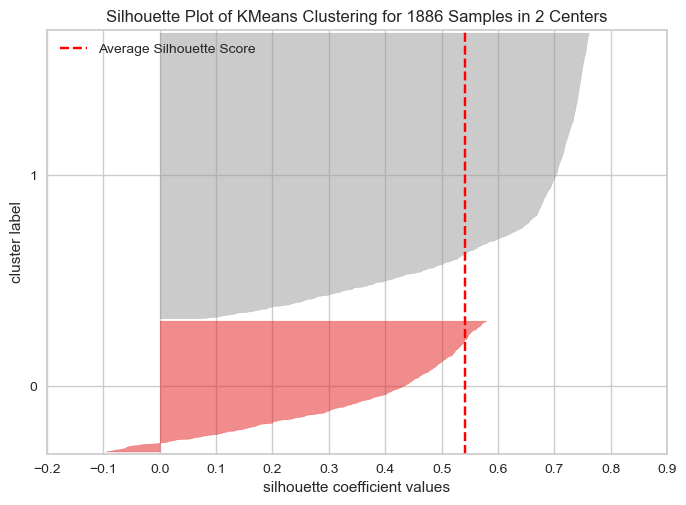

----------------------------------------------------------------------------------------------------


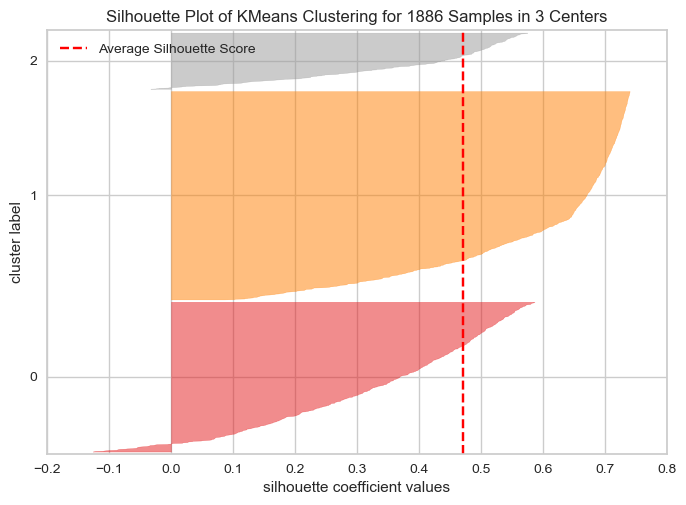

In [362]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(X_train_robust)

    # show the chart
    visualizer.poof()

##### PCA Clustering Visuals

----------------------------------------------------------------------------------------------------


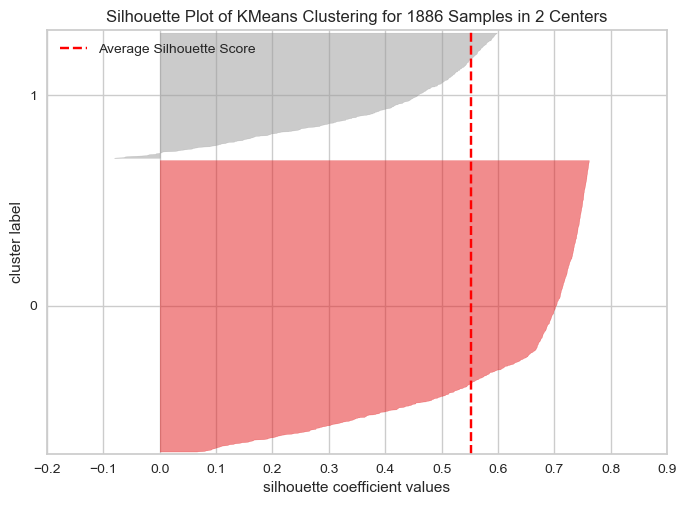

----------------------------------------------------------------------------------------------------


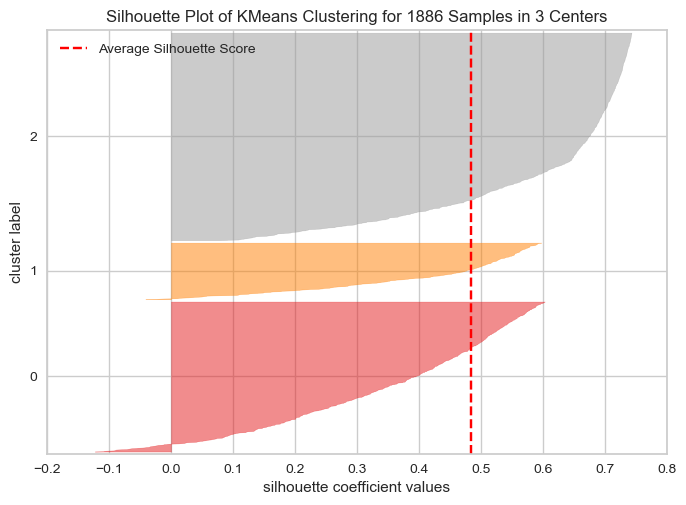

In [366]:
clusters = [2,3]

for cluster in clusters:

    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(pca_dataset)

    # show the chart
    visualizer.poof()


### Chart the Clusters

----------------------------------------------------------------------------------------------------


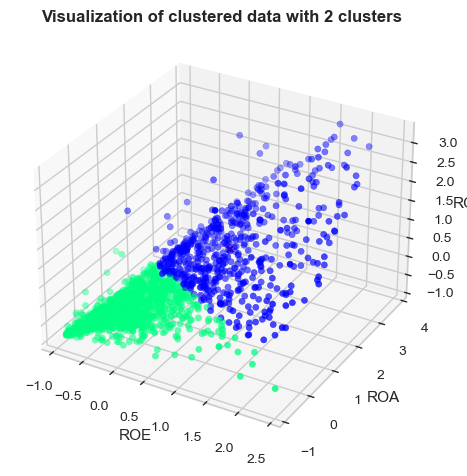

----------------------------------------------------------------------------------------------------


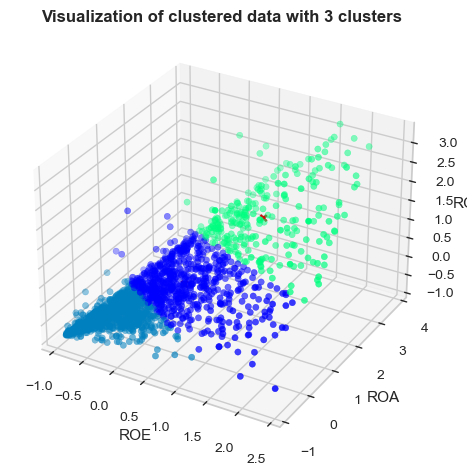

In [377]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(X_train_robust)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]
    C3 = cluster_centers[:, 2]

    # create a new plot
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # take the scaled data in this example.
    x = X_train_robust[:,0]
    y = X_train_robust[:,1]
    z = X_train_robust[:,2]

    # define the axes labels
    column_names = indicators_df.columns
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])

    # create a new plot
    ax.scatter(x, y, z, c = kmeans.labels_.astype(float), cmap='winter')
    ax.scatter(C1, C2, C3, marker="x", color='r')

    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')

    plt.show()


##### Clustering with PCA.

----------------------------------------------------------------------------------------------------


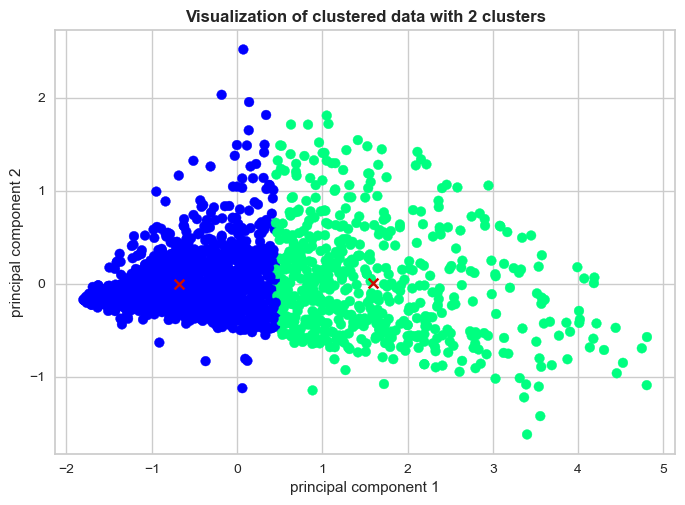

----------------------------------------------------------------------------------------------------


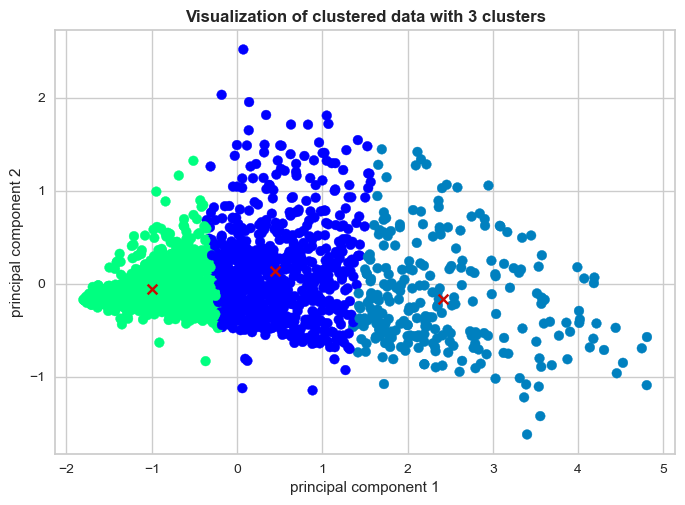

In [382]:
clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)
    
    kmeans = KMeans(n_clusters= cluster, random_state=0).fit(pca_dataset)
    
    # define the cluster centers
    cluster_centers = kmeans.cluster_centers_
    C1 = cluster_centers[:, 0]
    C2 = cluster_centers[:, 1]

    # create a new plot
    plt.figure()

    # take the scaled data in this example.
    x = pca_dataset['principal component 1']
    y = pca_dataset['principal component 2']


    # define the axes labels
    column_names = pca_dataset.columns
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])

    # Visualize it:
    plt.scatter(x, y, c=kmeans.labels_.astype(float), cmap='winter')
    plt.scatter(C1, C2, marker="x", color='r')

    # Plot the clustered data
    plt.title('Visualization of clustered data with {} clusters'.format(cluster), fontweight='bold')
    plt.show()


### Make Predictions.

In [385]:
# Create the model.
kmeans = results_dict[3]['model']

# define some test data
test_data = [[0.10, 3.10, 5.20],
             [0.60, 5.10, 2.20]]

# make some predictions, in this case let's pass through our test set.
kmeans.predict(test_data)



array([2, 2], dtype=int32)